# setup

In [1]:
!pip install ucimlrepo

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from sklearn.datasets import make_blobs
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
energy_efficiency = fetch_ucirepo(id=242)

# data (as pandas dataframes)
X = energy_efficiency.data.features
y = energy_efficiency.data.targets

In [4]:
meta = energy_efficiency.variables
meta

,name,role,type,demographic,description,units,missing_values
0,X1,Feature,Continuous,None,Relative Compactness,None,no
1,X2,Feature,Continuous,None,Surface Area,None,no
2,X3,Feature,Continuous,None,Wall Area,None,no
3,X4,Feature,Continuous,None,Roof Area,None,no
4,X5,Feature,Continuous,None,Overall Height,None,no
5,X6,Feature,Integer,None,Orientation,None,no
6,X7,Feature,Continuous,None,Glazing Area,None,no
7,X8,Feature,Integer,None,Glazing Area Distribution,None,no
8,Y1,Target,Continuous,None,Heating Load,None,no
9,Y2,Target,Continuous,None,Cooling Load,None,no


let's perform some EDA to better investigate the dataset

In [5]:
df = pd.concat([X, y], axis=1)

# EDA

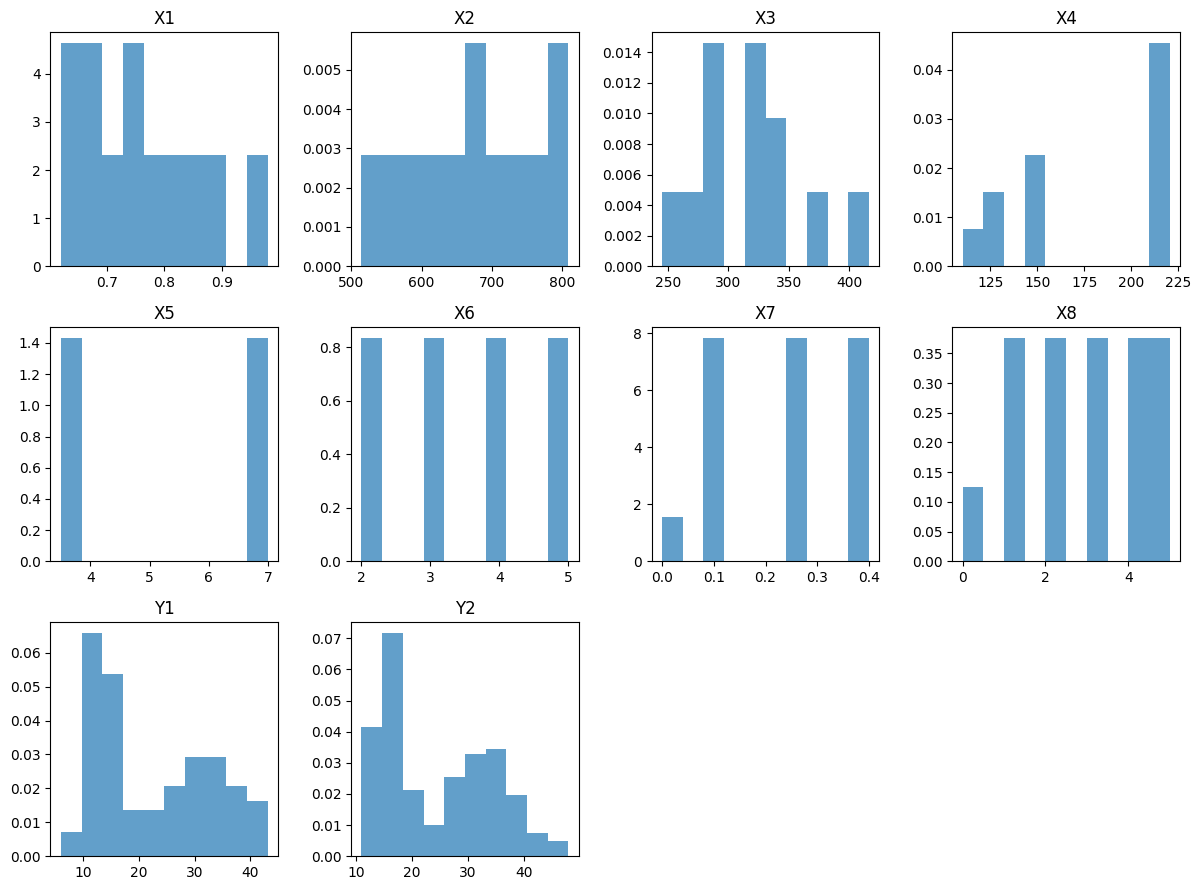

In [6]:
n_cols = 4
n_rows = math.ceil(len(df.columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(df.columns):
  axes[idx].hist(df[col], alpha=0.7, ec = 'w', density = True)
  axes[idx].set_title(f'{col}')

for idx in range(len(df.columns), len(axes)):
  fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

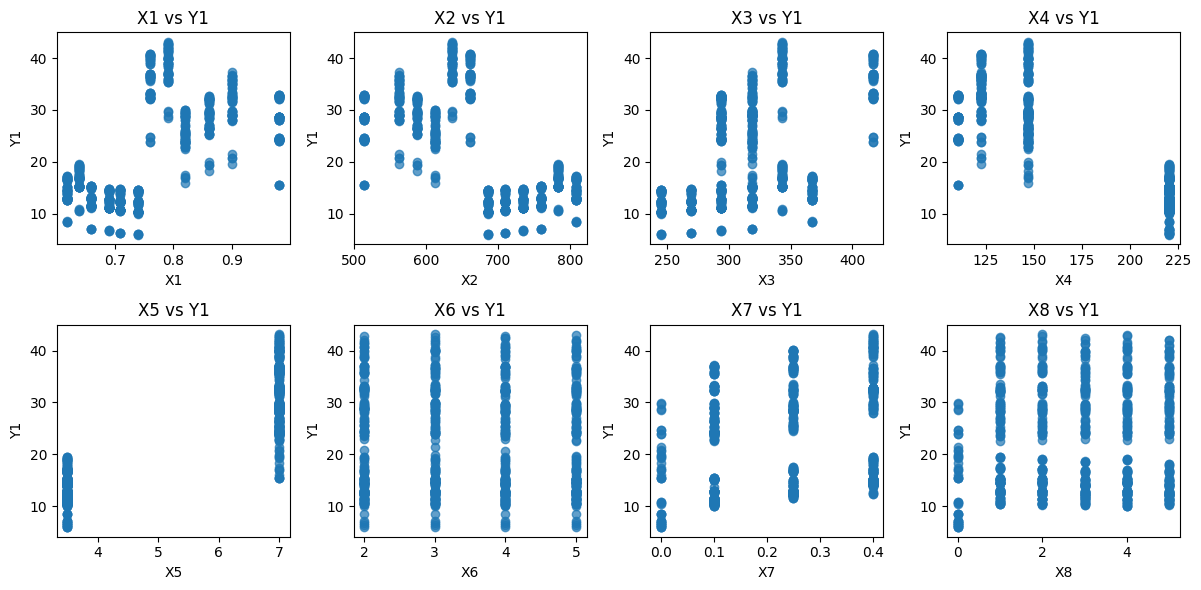

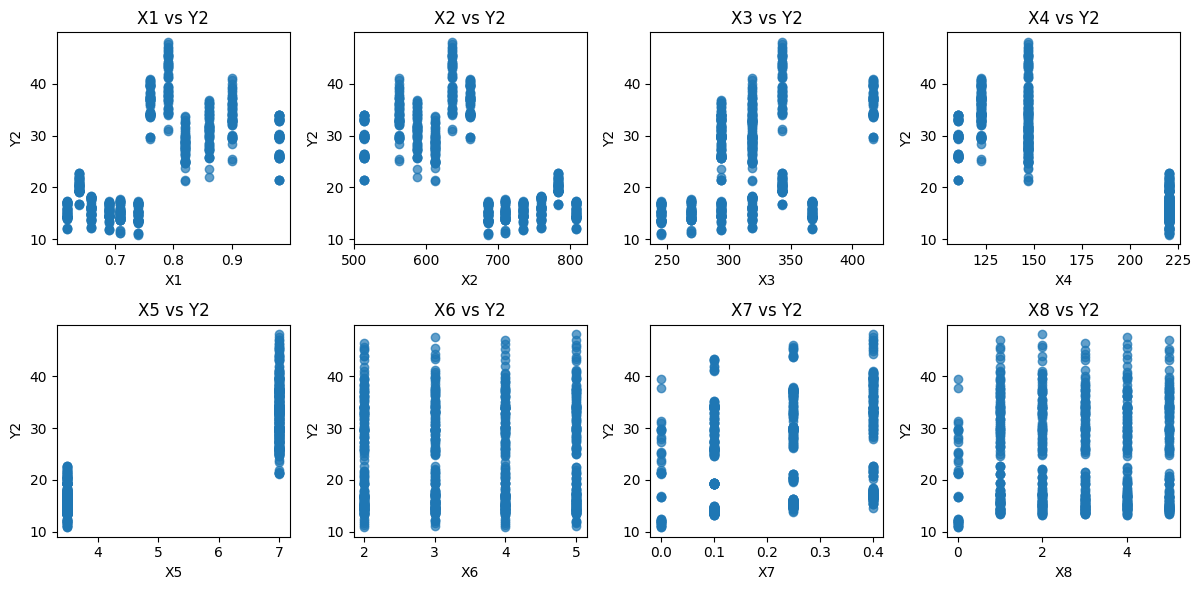

In [7]:
for i in ['Y1', 'Y2']:
  n_cols = 4
  n_rows = math.ceil(len(X.columns) / n_cols)

  fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))
  axes = axes.flatten()

  for idx, col in enumerate(X.columns):
      axes[idx].scatter(df[col], df[i], alpha=0.7)
      axes[idx].set_title(f'{col} vs {i}')
      axes[idx].set_xlabel(col)
      axes[idx].set_ylabel(i)

  for idx in range(len(X.columns), len(axes)):
      fig.delaxes(axes[idx])

  plt.tight_layout()
  plt.show()
  print('\n\n\n')

In [8]:
#scaling Y1 and Y2 though not required
cluster_df = df[['Y1', 'Y2']]
scaler = MinMaxScaler()
cluster_df = scaler.fit_transform(cluster_df)
cluster_df = pd.DataFrame(cluster_df, columns=df[['Y1', 'Y2']].columns)

In [9]:
#lr
model = LinearRegression()
model.fit(np.array(cluster_df['Y1']).reshape(-1,1), cluster_df['Y2'])

LinearRegression()

In [10]:
#clustering
km = KMeans(n_clusters=2)
y_pred = km.fit_predict(cluster_df)
cluster_df['cluster'] = y_pred

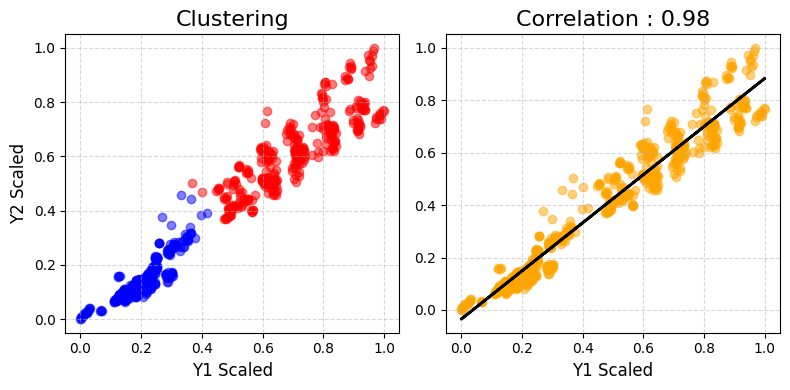

In [11]:
corr = np.round(df["Y1"].corr(df["Y2"]), 2)
cluster1 = cluster_df[cluster_df['cluster'] == 0]
cluster2 = cluster_df[cluster_df['cluster'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Clustering Plot
axes[0].scatter(cluster1['Y1'], cluster1['Y2'], color='blue', alpha=0.5)
axes[0].scatter(cluster2['Y1'], cluster2['Y2'], color='red', alpha=0.5)
axes[0].set_title('Clustering', fontsize=16)
axes[0].set_xlabel('Y1 Scaled', fontsize=12)
axes[0].set_ylabel('Y2 Scaled', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.5)

# Linear Regression Plot
axes[1].scatter(cluster_df['Y1'], cluster_df['Y2'], alpha=0.5, color = 'orange')
axes[1].plot(cluster_df['Y1'], model.predict(np.array(cluster_df['Y1']).reshape(-1, 1)), color='k', linewidth=2)
axes[1].set_title(f'Correlation : {corr}', fontsize=16)
axes[1].set_xlabel('Y1 Scaled', fontsize=12)
axes[1].set_xlabel('Y1 Scaled', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [12]:
x = 0.4 *np.std(df['Y1']) + df['Y1'].mean()

mu1 = df[df['Y1'] <= x]['Y1'].mean()
mu2 = df[df['Y1'] > x]['Y1'].mean()
mu = df['Y1'].mean()
med1 = df[df['Y1'] <= x]['Y1'].median()
med2 = df[df['Y1'] > x]['Y1'].median()

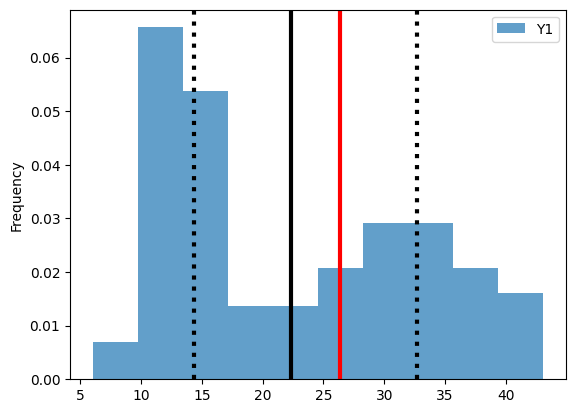

In [13]:
df.plot(kind='hist', y='Y1', alpha=0.7, ec = 'w', density = True)
# plt.axvline(mu1, color = 'k', linestyle = '--', linewidth = 3)
# plt.axvline(mu2, color = 'k', linestyle = '--', linewidth = 3)
plt.axvline(med1, color = 'k', linestyle = ':', linewidth = 3)
plt.axvline(med2, color = 'k', linestyle = ':', linewidth = 3)
plt.axvline(mu, color = 'k', linestyle = '-', linewidth = 3)
plt.axvline(x, color = 'red', linewidth = 3);

In [14]:
x = 0.4 *np.std(df['Y2']) + df['Y2'].mean()

mu1 = df[df['Y2'] <= x]['Y2'].mean()
mu2 = df[df['Y2'] > x]['Y2'].mean()
mu = df['Y1'].mean()
med1 = df[df['Y2'] <= x]['Y2'].median()
med2 = df[df['Y2'] > x]['Y2'].median()

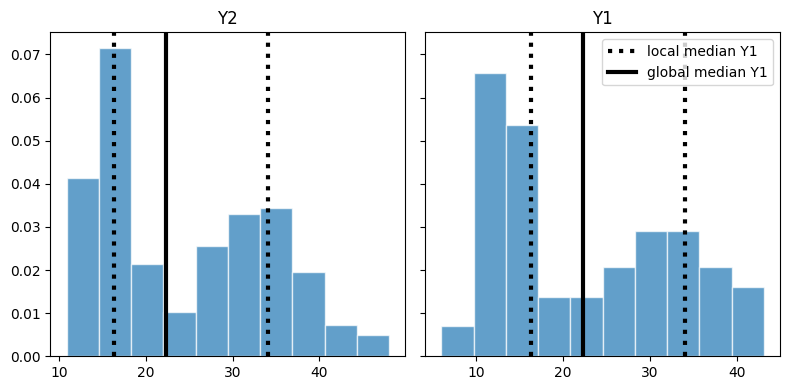

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

axes[0].hist(df['Y2'], bins=10, alpha=0.7, edgecolor='w', density=True)
axes[0].axvline(med1, color='k', linestyle=':', linewidth=3, label = 'local median Y1')
axes[0].axvline(med2, color='k', linestyle=':', linewidth=3, label = 'local median Y1')
axes[0].axvline(mu, color='k', linestyle='-', linewidth=3, label = 'global mean Y2')
axes[0].set_title('Y2')

# Plot for Y1
axes[1].hist(df['Y1'], bins=10, alpha=0.7, edgecolor='w', density=True)
axes[1].axvline(med1, color='k', linestyle=':', linewidth=3)
axes[1].axvline(med2, color='k', linestyle=':', linewidth=3, label = 'local median Y1')
axes[1].axvline(mu, color='k', linestyle='-', linewidth=3, label = 'global median Y1')
axes[1].set_title('Y1')

plt.tight_layout()
plt.legend()
plt.show()

#Splitted MLR

In [16]:
def pred_mlr(data):

  X_train, X_test, y_train, y_test = train_test_split(data[X.columns], data[y.columns], test_size= 0.3, random_state = 10)

  train = pd.concat([X_train, y_train], axis=1)
  test = pd.concat([X_test, y_test], axis=1)

  model = LinearRegression()
  model.fit(train[X.columns], train[y.columns])

  pred = model.predict(test[X.columns])
  predicted = test.assign(Y1_pred = pred[:,0], Y2_pred = pred[:,1])
  return predicted

In [17]:
def plot_pred_mlr(data):
  predicted = pred_mlr(data)
  for i in ['Y1', 'Y2']:
    n_cols = 4
    n_rows = math.ceil(len(X.columns) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))
    axes = axes.flatten()

    for idx, col in enumerate(X.columns):
        axes[idx].scatter(predicted[col], predicted[i], alpha=0.7)
        axes[idx].scatter(predicted[[col]], predicted[i+'_pred'], alpha=0.7, c = 'r')
        axes[idx].set_title(f'{col} vs {i}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel(i)

    for idx in range(len(X.columns), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()
    print('\n\n\n')

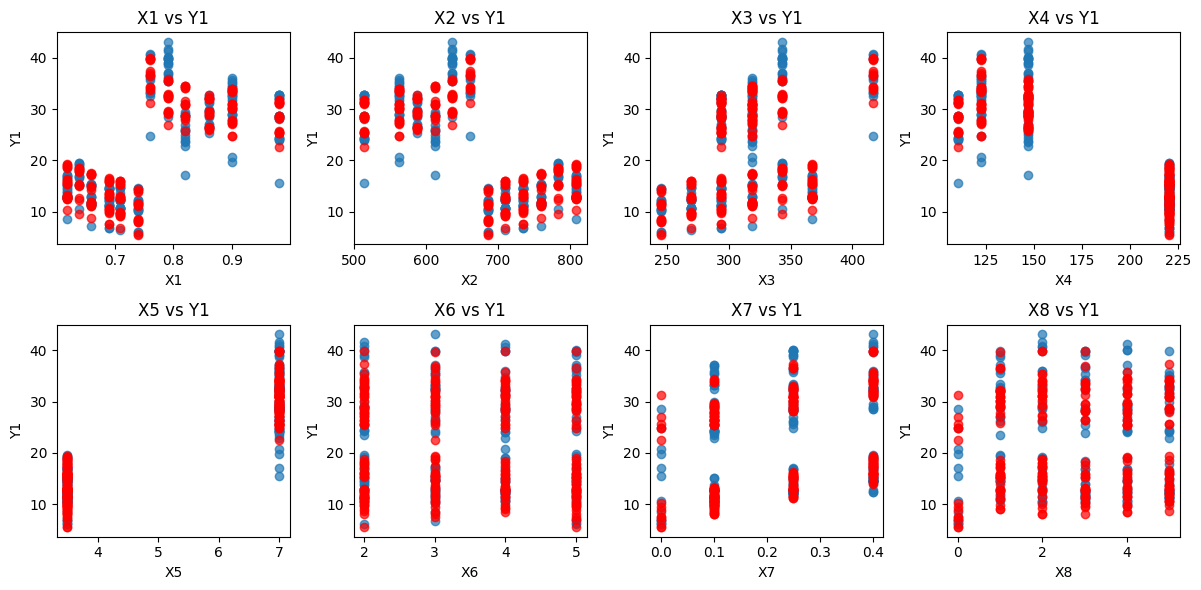

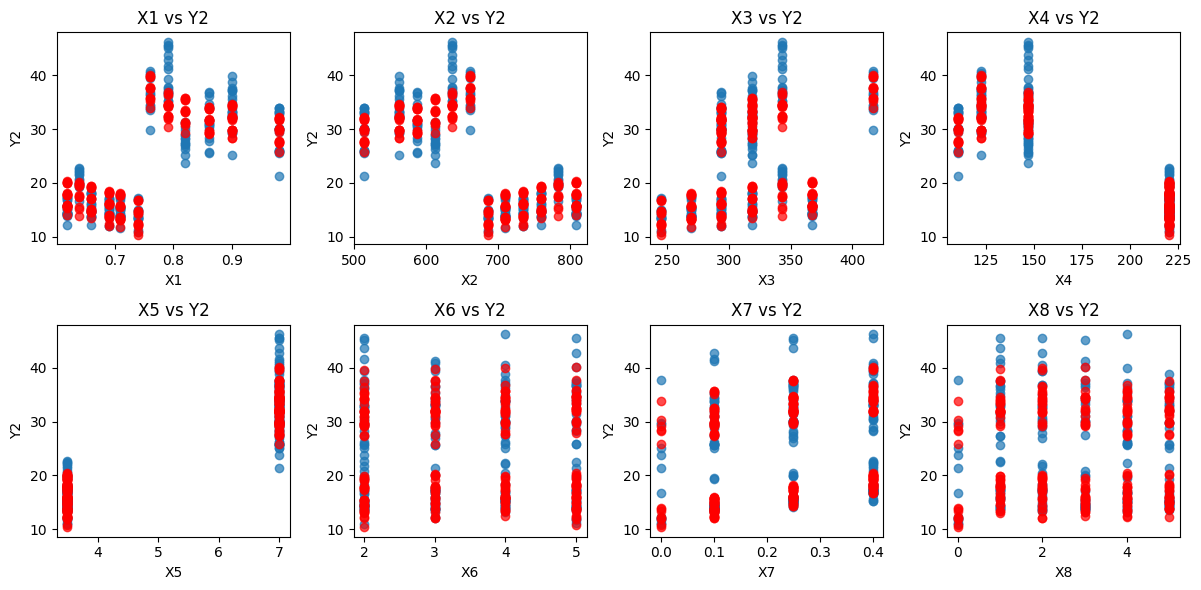

In [18]:
plot_pred_mlr(df)

In [19]:
def residual(data):
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))  # 1 row, 2 columns
    axes = axes.flatten()
    predicted = pred_mlr(data)

    for idx, i in enumerate(['Y1', 'Y2']):
        res = np.array(predicted[i]-predicted[f'{i}_pred'])
        actual = np.array(predicted[f'{i}_pred'])

        axes[idx].scatter(actual, res, alpha=0.7)
        axes[idx].axhline(y=0, color='r', linestyle='-')
        axes[idx].set_xlabel(f'Actual {i}')
        axes[idx].set_ylabel('Residuals')
        axes[idx].set_title(f'{i} Residual')

    plt.tight_layout()
    plt.show()

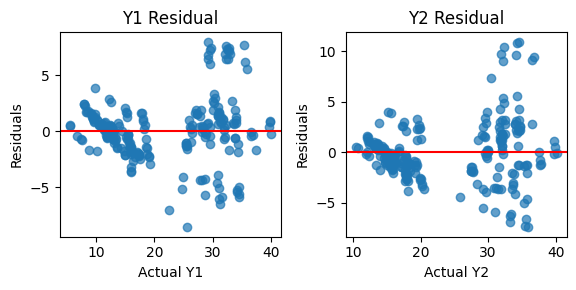

In [20]:
residual(df)

In [21]:
def r2(data):
    predicted = pred_mlr(data)
    y_true = np.array(predicted[['Y1', 'Y2']])
    y_pred = np.array(predicted[['Y1_pred', 'Y2_pred']])
    score = r2_score(y_true, y_pred)
    return score

In [22]:
r2(df)

0.911761780913406

In [23]:
predicted = pred_mlr(df)

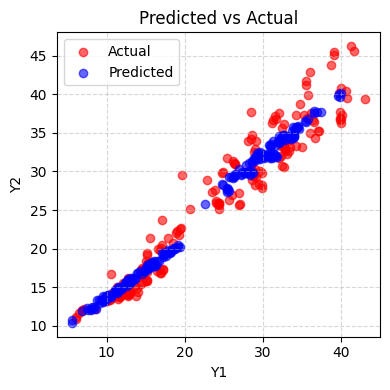

In [24]:
plt.figure(figsize=(4, 4))
plt.scatter(np.array(predicted['Y1']), np.array(predicted['Y2']),color='red', alpha=0.6, label='Actual')
plt.scatter(np.array(predicted['Y1_pred']), np.array(predicted['Y2_pred']),color='blue', alpha=0.6, label='Predicted')
plt.title('Predicted vs Actual')
plt.xlabel('Y1')
plt.ylabel('Y2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

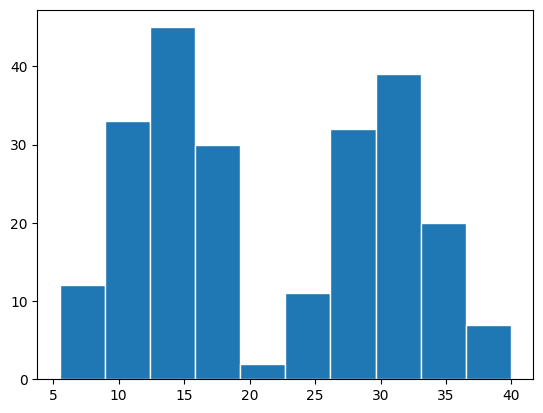

In [25]:
plt.hist(np.array(predicted['Y1_pred']), edgecolor = 'w');

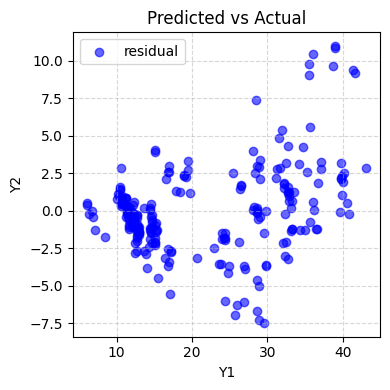

In [26]:
plt.figure(figsize=(4, 4))
plt.scatter(np.array(predicted['Y1']), np.array(predicted['Y2'])- np.array(predicted['Y2_pred']),color='blue', alpha=0.6, label='residual')
plt.title('Predicted vs Actual')
plt.xlabel('Y1')
plt.ylabel('Y2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [27]:
dfg20 = df[(df['Y1']>x)]
dfl20 = df[(df['Y1']<=x)]
split_df = pd.concat([dfl20, dfg20], ignore_index=True)

In [28]:
r2(split_df)

0.9116376453273292